In [250]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import nltk 
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from tqdm import tqdm
import re
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/amaltom/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
os.getcwd()

In [2]:
nash_list = pd.read_csv("Nashville_listings.csv")
nash_rev = pd.read_csv("Nashville_reviews.csv")
chi_list = pd.read_csv("Chicago_listings.csv")
chi_rev = pd.read_csv("Chicago_reviews.csv")

In [3]:
vaccination_data = pd.read_csv('COVID-19_Vaccinations_in_the_United_States_Jurisdiction.csv')
weekly_case_rate_US = pd.read_csv('data_table_for_weekly_case_trends__the_united_states.csv')

/Users/amaltom/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (4,5,6,7,8,10,11,13,15,16,18,19,22,25,26,28,32,34,38,40,42,44,46,48,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,73,75,77,79,81,83,84,85,86,87,88,90,92,93,94,95,96,97,98,99,100,101,103,105,107) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [55]:
nash_rev.shape

(493147, 9)

In [4]:
print(nash_list.shape)
print(nash_rev.shape)
print(chi_list.shape)
print(chi_rev.shape)

(7733, 18)
(493310, 6)
(7414, 18)
(343394, 6)


In [5]:
nash_list.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,6422.0,Nashville Charm,12172,Michele,NaN,District 6,36.17315,-86.73581,Private room,40,30,674,3/3/20,4.14,1,257,0,NaN
1,39870.0,Close to Vanderbilt 2,171184,Evelyn,NaN,District 18,36.12523,-86.81278,Private room,72,1,328,9/11/22,4.49,2,134,64,NaN
2,59576.0,Large Master Suite near Lake *ladies only NS plz,812128,Patricia And John,NaN,District 12,36.18749,-86.59004,Private room,39,31,1,6/26/22,0.37,10,180,1,NaN
3,72906.0,Vandy/Belmont/10 mins to Broadway - Sunny 800 ...,176117,Richard,NaN,District 18,36.13122,-86.80066,Entire home/apt,105,2,658,9/11/22,4.79,1,59,56,NaN
4,258817.0,"ButterflyRoom-queen room, private bath",22296,Diana,NaN,District 12,36.16249,-86.58988,Private room,39,30,96,12/14/19,0.73,8,288,0,NaN


In [54]:
nash_

,listing_id,id,date,reviewer_id,reviewer_name,comments,Positive_score,Negative_score,Neutral_score
493305,40982948,592188948,2020-01-12,254539015,Joshua,"Great place to stay. Clean, and comfortable fe...",0.748,0.0,0.252
493306,40982948,601132549,2020-02-02,144599965,Mary,"Efrain's home felt clean, secure, and quiet. W...",0.202,0.0,0.798
493307,40982948,632029069,2020-06-25,268422549,Sam,"Recommended, clean and nice place to stay! Dra...",0.548,0.0,0.452
493308,40982948,744726211,2021-04-02,118734131,Daniel,Definitely a good option for a nights rest! Wo...,0.681,0.0,0.319
493309,40982948,467396323893639800,2021-10-06,90673403,Ella,"Amazing stay! Exactly what I needed, met a cou...",0.443,0.0,0.557


In [7]:
chi_list.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2384.0,Hyde Park - Walk to UChicago,2613,Rebecca,NaN,Hyde Park,41.787900,-87.587800,Private room,110,3,207,9/9/22,2.21,1,320,19,R17000015609
1,7126.0,Tiny Studio Apartment 94 Walk Score,17928,Sarah,NaN,West Town,41.901660,-87.680210,Entire home/apt,91,2,459,8/28/22,2.86,1,320,51,R21000075737
2,10945.0,The Biddle House (#1),33004,At Home Inn,NaN,Lincoln Park,41.911960,-87.639810,Entire home/apt,157,4,56,8/23/22,0.55,9,137,23,2209984
3,12140.0,Lincoln Park Guest House,46734,Sharon And Robert,NaN,Lincoln Park,41.923570,-87.649470,Private room,329,2,13,9/12/22,0.15,1,165,6,R20000055258
4,24833.0,Prime LincolnPark 1 Block Fullerton Express L ...,101521,Red,NaN,Lincoln Park,41.925961,-87.656364,Entire home/apt,86,32,40,4/23/22,0.27,3,306,2,City registration pending


In [8]:
chi_rev.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,2384,25218143,2015-01-09,14385014,Ivan,it's a wonderful trip experience. I didn't exc...
1,2384,28475392,2015-03-24,16241178,Namhaitou,This is my first trip using Airbnb. I was a li...
2,189821,536083,2011-09-16,124036,Jenny,Meighan was a great host! Communication was e...
3,189821,550149,2011-09-20,911939,Bonnie,"Great apartment, wonderful, helpful host! It ..."
4,189821,577757,2011-09-28,938072,Lauren,Amazing apt. Very clean and comfortable. Would...


In [9]:
nash_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7733 entries, 0 to 7732
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              7733 non-null   float64
 1   name                            7733 non-null   object 
 2   host_id                         7733 non-null   int64  
 3   host_name                       7653 non-null   object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   7733 non-null   object 
 6   latitude                        7733 non-null   float64
 7   longitude                       7733 non-null   float64
 8   room_type                       7733 non-null   object 
 9   price                           7733 non-null   int64  
 10  minimum_nights                  7733 non-null   int64  
 11  number_of_reviews               7733 non-null   int64  
 12  last_review                     68

In [10]:
nash_rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 493310 entries, 0 to 493309
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   listing_id     493310 non-null  int64 
 1   id             493310 non-null  int64 
 2   date           493310 non-null  object
 3   reviewer_id    493310 non-null  int64 
 4   reviewer_name  493309 non-null  object
 5   comments       493148 non-null  object
dtypes: int64(3), object(3)
memory usage: 22.6+ MB


In [11]:
chi_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7414 entries, 0 to 7413
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              7414 non-null   float64
 1   name                            7414 non-null   object 
 2   host_id                         7414 non-null   int64  
 3   host_name                       7414 non-null   object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   7414 non-null   object 
 6   latitude                        7414 non-null   float64
 7   longitude                       7414 non-null   float64
 8   room_type                       7414 non-null   object 
 9   price                           7414 non-null   int64  
 10  minimum_nights                  7414 non-null   int64  
 11  number_of_reviews               7414 non-null   int64  
 12  last_review                     61

In [12]:
chi_rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343394 entries, 0 to 343393
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   listing_id     343394 non-null  int64 
 1   id             343394 non-null  int64 
 2   date           343394 non-null  object
 3   reviewer_id    343394 non-null  int64 
 4   reviewer_name  343394 non-null  object
 5   comments       343302 non-null  object
dtypes: int64(3), object(3)
memory usage: 15.7+ MB


In [13]:
nash_list.drop(labels =['neighbourhood_group','license'],axis = 'columns', inplace = True)

In [14]:
nash_list.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,6422.0,Nashville Charm,12172,Michele,District 6,36.17315,-86.73581,Private room,40,30,674,3/3/20,4.14,1,257,0
1,39870.0,Close to Vanderbilt 2,171184,Evelyn,District 18,36.12523,-86.81278,Private room,72,1,328,9/11/22,4.49,2,134,64
2,59576.0,Large Master Suite near Lake *ladies only NS plz,812128,Patricia And John,District 12,36.18749,-86.59004,Private room,39,31,1,6/26/22,0.37,10,180,1
3,72906.0,Vandy/Belmont/10 mins to Broadway - Sunny 800 ...,176117,Richard,District 18,36.13122,-86.80066,Entire home/apt,105,2,658,9/11/22,4.79,1,59,56
4,258817.0,"ButterflyRoom-queen room, private bath",22296,Diana,District 12,36.16249,-86.58988,Private room,39,30,96,12/14/19,0.73,8,288,0


In [15]:
chi_list.drop(labels ='neighbourhood_group', axis = 'columns', inplace = True)

In [16]:
chi_list.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2384.0,Hyde Park - Walk to UChicago,2613,Rebecca,Hyde Park,41.787900,-87.587800,Private room,110,3,207,9/9/22,2.21,1,320,19,R17000015609
1,7126.0,Tiny Studio Apartment 94 Walk Score,17928,Sarah,West Town,41.901660,-87.680210,Entire home/apt,91,2,459,8/28/22,2.86,1,320,51,R21000075737
2,10945.0,The Biddle House (#1),33004,At Home Inn,Lincoln Park,41.911960,-87.639810,Entire home/apt,157,4,56,8/23/22,0.55,9,137,23,2209984
3,12140.0,Lincoln Park Guest House,46734,Sharon And Robert,Lincoln Park,41.923570,-87.649470,Private room,329,2,13,9/12/22,0.15,1,165,6,R20000055258
4,24833.0,Prime LincolnPark 1 Block Fullerton Express L ...,101521,Red,Lincoln Park,41.925961,-87.656364,Entire home/apt,86,32,40,4/23/22,0.27,3,306,2,City registration pending


In [17]:
nash_list.dropna(how = 'any', inplace = True)
chi_list.dropna(how = 'any', inplace = True)

In [18]:
nash_list.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,6.796000e+03,6.796000e+03,6796.000000,6796.000000,6796.000000,6796.000000,6796.000000,6796.000000,6796.000000,6796.000000,6796.000000
mean,1.253756e+17,1.451713e+08,36.163063,-86.768221,268.252943,5.431725,72.576368,2.456617,22.630224,213.174220,23.766480
std,2.480696e+17,1.409427e+08,0.044321,0.054948,271.289124,23.365438,103.866609,2.554335,39.567340,121.444896,27.627045
min,6.422000e+03,6.383000e+03,35.968580,-87.035210,0.000000,1.000000,1.000000,0.010000,1.000000,0.000000,0.000000
25%,2.711895e+07,2.839310e+07,36.143195,-86.796063,130.000000,1.000000,9.000000,0.880000,1.000000,115.750000,4.000000
50%,4.464422e+07,1.002381e+08,36.159675,-86.775700,206.500000,2.000000,34.000000,1.980000,3.000000,242.000000,16.000000
75%,5.358685e+07,2.310116e+08,36.185110,-86.744060,322.000000,2.000000,94.000000,3.402500,23.250000,327.000000,35.000000
max,7.099520e+17,4.774018e+08,36.404770,-86.519350,10498.000000,999.000000,1197.000000,93.660000,178.000000,365.000000,768.000000


In [19]:
chi_list.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,5.472000e+03,5.472000e+03,5472.000000,5472.000000,5472.000000,5472.000000,5472.000000,5472.000000,5472.000000,5472.000000,5472.000000
mean,1.208366e+17,1.439370e+08,41.897253,-87.664707,206.977156,10.900219,58.984101,2.042950,17.097039,189.166118,17.912098
std,2.475801e+17,1.412058e+08,0.062124,0.042604,283.909391,38.644250,89.904161,1.939468,71.936429,131.948107,27.881020
min,2.384000e+03,2.153000e+03,41.650640,-87.846720,18.000000,1.000000,1.000000,0.010000,1.000000,0.000000,0.000000
25%,2.399725e+07,2.470599e+07,41.862677,-87.688523,90.000000,1.000000,7.750000,0.620000,1.000000,66.000000,2.000000
50%,4.104719e+07,9.673061e+07,41.902115,-87.661761,145.000000,2.000000,27.000000,1.690000,2.000000,176.000000,11.000000
75%,5.265374e+07,2.371299e+08,41.940780,-87.634579,239.250000,7.000000,74.000000,3.000000,8.000000,328.000000,27.000000
max,7.065710e+17,4.777160e+08,42.022200,-87.534090,10000.000000,1125.000000,2600.000000,55.710000,525.000000,365.000000,1284.000000


In [20]:
nash_list.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6796 entries, 0 to 7732
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              6796 non-null   float64
 1   name                            6796 non-null   object 
 2   host_id                         6796 non-null   int64  
 3   host_name                       6796 non-null   object 
 4   neighbourhood                   6796 non-null   object 
 5   latitude                        6796 non-null   float64
 6   longitude                       6796 non-null   float64
 7   room_type                       6796 non-null   object 
 8   price                           6796 non-null   int64  
 9   minimum_nights                  6796 non-null   int64  
 10  number_of_reviews               6796 non-null   int64  
 11  last_review                     6796 non-null   object 
 12  reviews_per_month               67

In [21]:
chi_list.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5472 entries, 0 to 7403
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              5472 non-null   float64
 1   name                            5472 non-null   object 
 2   host_id                         5472 non-null   int64  
 3   host_name                       5472 non-null   object 
 4   neighbourhood                   5472 non-null   object 
 5   latitude                        5472 non-null   float64
 6   longitude                       5472 non-null   float64
 7   room_type                       5472 non-null   object 
 8   price                           5472 non-null   int64  
 9   minimum_nights                  5472 non-null   int64  
 10  number_of_reviews               5472 non-null   int64  
 11  last_review                     5472 non-null   object 
 12  reviews_per_month               54

In [22]:
nash_rev.dropna(how = 'any', inplace = True)
chi_rev.dropna(how = 'any', inplace = True)

In [23]:
print(nash_rev.shape)
print(chi_rev.shape)

(493147, 6)
(343302, 6)


In [24]:
nash_rev.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 493147 entries, 0 to 493309
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   listing_id     493147 non-null  int64 
 1   id             493147 non-null  int64 
 2   date           493147 non-null  object
 3   reviewer_id    493147 non-null  int64 
 4   reviewer_name  493147 non-null  object
 5   comments       493147 non-null  object
dtypes: int64(3), object(3)
memory usage: 26.3+ MB


In [25]:
chi_rev.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 343302 entries, 0 to 343393
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   listing_id     343302 non-null  int64 
 1   id             343302 non-null  int64 
 2   date           343302 non-null  object
 3   reviewer_id    343302 non-null  int64 
 4   reviewer_name  343302 non-null  object
 5   comments       343302 non-null  object
dtypes: int64(3), object(3)
memory usage: 18.3+ MB


In [26]:
nash_avg_pr_by_nh = pd.DataFrame(nash_list.groupby('neighbourhood')['price'].mean())
nash_avg_pr_by_nh.reset_index(inplace = True)
nash_avg_pr_by_nh.sort_values(by = 'price', axis = 0, inplace = True)

<BarContainer object of 35 artists>

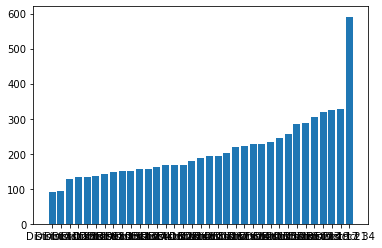

In [27]:
plt.bar(nash_avg_pr_by_nh.neighbourhood, nash_avg_pr_by_nh.price)

In [29]:
nash_avg_pr_by_rt = pd.DataFrame(nash_list.groupby('room_type')['price'].mean())
nash_avg_pr_by_rt.reset_index(inplace = True)
nash_avg_pr_by_rt.sort_values(by = 'price', axis = 0, inplace = True)

<BarContainer object of 4 artists>

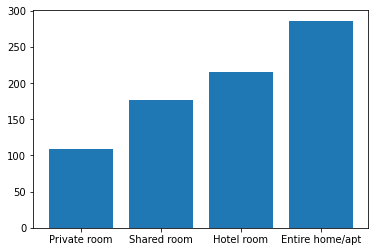

In [30]:
plt.bar(nash_avg_pr_by_rt['room_type'], nash_avg_pr_by_rt.price)

In [31]:
chi_avg_pr_by_rt = pd.DataFrame(chi_list.groupby('room_type')['price'].mean())
chi_avg_pr_by_rt.reset_index(inplace = True)
chi_avg_pr_by_rt.sort_values(by = 'price', axis = 0, inplace = True)

<BarContainer object of 4 artists>

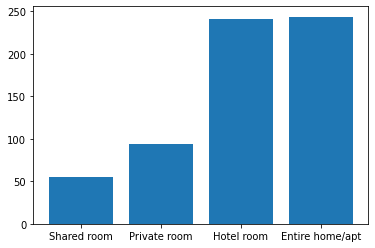

In [32]:
plt.bar(chi_avg_pr_by_rt['room_type'], chi_avg_pr_by_rt.price)

In [33]:
nash_avg_pr_by_nol = pd.DataFrame(nash_list.groupby('calculated_host_listings_count')['price'].mean())
nash_avg_pr_by_nol.reset_index(inplace = True)
nash_avg_pr_by_nol.sort_values(by = 'calculated_host_listings_count', axis = 0, inplace = True)

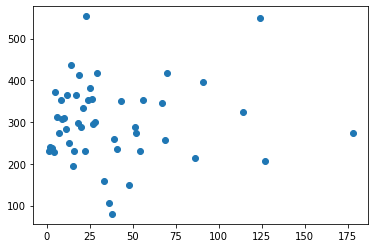

In [34]:
plt.scatter(nash_avg_pr_by_nol['calculated_host_listings_count'], nash_avg_pr_by_nol.price)

In [ ]:
chi_avg_pr_by_nol = pd.DataFrame(chi_list.groupby('calculated_host_listings_count')['price'].mean())
chi_avg_pr_by_nol.reset_index(inplace = True)
chi_avg_pr_by_nol.sort_values(by = 'calculated_host_listings_count', axis = 0, inplace = True)

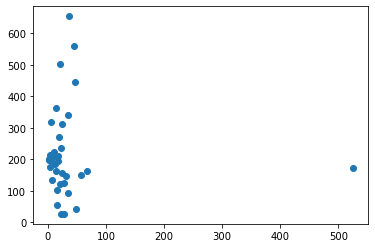

In [37]:
plt.scatter(chi_avg_pr_by_nol['calculated_host_listings_count'], chi_avg_pr_by_nol.price)

In [36]:
chi_list_count = pd.DataFrame(chi_list.groupby('host_id')['id'].count())
chi_list_count.reset_index(inplace = True)
chi_list_count.sort_values(by = 'id', axis = 0, inplace = True)
chi_list_count

,host_id,id
1454,74462380,1
1748,122823566,1
1749,122849110,1
1750,122884640,1
1751,124094363,1
...,...,...
229,3965428,36
2658,395498979,40
2306,243035563,43
1156,47172572,54


In [38]:
x = nash_list[['neighbourhood','room_type','minimum_nights','number_of_reviews']]
x = pd.get_dummies(x)
y = nash_list[['price']]

In [39]:
x_train = x[101:]
y_train = y[101:]
x_test = x[:100]
y_test = y[:100]

In [40]:
reg = LinearRegression().fit(x_train, y_train)

In [41]:
reg.score(x_train, y_train)

0.0944759587060301

### Sentiment Analysis

In [150]:
nash_rev_sample = nash_rev.sample(frac=1.0)
chi_rev_sample = chi_rev.sample(frac=1.0)

In [151]:
import re

def generate_ngrams(s, n):
    # Convert to lowercases
    s = s.lower()
    
    # Replace all none alphanumeric characters with spaces
    s = re.sub(r'[^a-zA-Z0-9\s]', ' ', s)
    
    # Break sentence in the token, remove empty tokens
    tokens = [token for token in s.split(" ") if token != ""]
    
    # Use the zip function to help us generate n-grams
    # Concatentate the tokens into ngrams and return
    ngrams = zip(*[tokens[i:] for i in range(n)])
    return [" ".join(ngram) for ngram in ngrams]

In [152]:
#k = generate_ngrams(nash_rev_sample['comments'][0],2)
list1 = list(nash_rev_sample['comments'])

In [153]:
main_list=[]
for i in range(len(nash_rev_sample)):
    list_2 = []
    list_temp = generate_ngrams(list1[i], n=1)
    list_2.append(list_temp)
    list_temp = generate_ngrams(list1[i], n=2)
    list_2.append(list_temp)
    list_2 = [item for sublist in list_2 for item in sublist]
    main_list.append(list_2)

In [154]:
nash_rev_sample['comments_bi'] = main_list
nash_rev_sample.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,Positive_score,Negative_score,Neutral_score,comments_bi
134736,15886439,156091410,2017-05-29,60751164,Chelsea,Perfect location and convince for a larger gro...,0.515,0.0,0.485,"[perfect, location, and, convince, for, a, lar..."
409063,45782248,584076493032185123,2022-03-16,428302558,Ryan,Great place. Perfect location,0.796,0.0,0.204,"[great, place, perfect, location, great place,..."
386664,43241420,425266136732629578,2021-08-09,125613037,Leslie,Great location and easy to get anywhere in the...,0.438,0.0,0.562,"[great, location, and, easy, to, get, anywhere..."
59752,5093371,264404259,2018-05-13,185309302,Chandra,"Super comfy, super clean and everything as pro...",0.720,0.0,0.280,"[super, comfy, super, clean, and, everything, ..."
273691,27831981,465866288364148194,2021-10-04,135272796,Chelsea,This is a great spot only minutes from downtow...,0.370,0.0,0.630,"[this, is, a, great, spot, only, minutes, from..."


In [155]:
review_collection = []
for line in nash_rev_sample['comments_bi']:
    single_comments = []
    for word in line:
        reg_sub = re.sub(r'[^\w\s]','',word)
        single_comments.append(reg_sub)
    review_collection.append(single_comments)

In [156]:
nash_rev_sample['cleaned_comments'] = review_collection

In [157]:
stopwords_list = stopwords.words('english')

words_to_add = ['ca','nt']
stopwords_list = stopwords_list + words_to_add

stop_words_removed_description=[]
for l in nash_rev_sample['cleaned_comments']:
    stop_words_removed=[]
    stop_words_removed=[word for word in l if word.lower() not in stopwords_list if word.isalpha()]
    stop_words_removed_description.append(stop_words_removed)

In [158]:
nash_rev_sample['stop_words_removed_comments'] = stop_words_removed_description

In [159]:
lemmatizer = WordNetLemmatizer()
lemmatized_description=[]
for l in nash_rev_sample['stop_words_removed_comments']:
    lemmatized_words=[]
    lemmatized_words=[lemmatizer.lemmatize(word.lower()) if word.isalpha() else word.lower() for word in l]
    lemmatized_description.append(lemmatized_words)

nash_rev_sample['lemmatized_comments'] = lemmatized_description

In [160]:
nash_rev_sample['final cleaned comments'] = [' '.join(word) for word in nash_rev_sample['lemmatized_comments']]

#### Topic Modelling - Nashville AirBNB

In [254]:
input_comments = nash_rev_sample['final cleaned comments']

vectorizer7 = CountVectorizer(stop_words='english', ngram_range=(1, 2), min_df=5)
X2 = vectorizer7.fit_transform(input_comments)
terms = vectorizer7.get_feature_names()

In [255]:
lda = LatentDirichletAllocation(n_components=6).fit(X2)

In [256]:
top_terms_topics = []
for index, component in enumerate(lda.components_):
    zipped = zip(terms, component)
    top_terms_key=sorted(zipped, key = lambda t:t[1], reverse=True)[:10]
    top_terms_list=list(dict(top_terms_key).keys())
    top_terms_topics.append(top_terms_list)
    print("Topic "+str(index)+": ",top_terms_list)
    

Topic 0:  ['br', 'br br', 'bed', 'room', 'nice', 'place', 'stay', 'bathroom', 'kitchen', 'house']
Topic 1:  ['house', 'perfect', 'nashville', 'place', 'stay', 'home', 'space', 'beautiful', 'amazing', 'absolutely']
Topic 2:  ['stay', 'nashville', 'home', 'place', 'comfortable', 'clean', 'host', 'cozy', 'super', 'recommend']
Topic 3:  ['great', 'place', 'stay', 'location', 'host', 'clean', 'recommend', 'great location', 'definitely', 'great place']
Topic 4:  ['great', 'location', 'easy', 'downtown', 'nashville', 'walk', 'clean', 'check', 'good', 'nice']
Topic 5:  ['great', 'place', 'downtown', 'uber', 'close', 'stay', 'ride', 'distance', 'walking', 'quick']


#### Sentiment Analysis - Nashville AirBNB

In [165]:
sid = SentimentIntensityAnalyzer()
sentences = nash_rev_sample['final cleaned comments']

In [ ]:
# airbnb smell like water damage wet mold unpleasant entire time also location lot everything expected ended spending lot lyft ride
# compound: -0.5859, 
# neg: 0.244, 
# neu: 0.659, 
# pos: 0.097, 

In [166]:
Positive_score = []
for sentence in sentences:
    ss_pos = sid.polarity_scores(sentence)['pos']
    Positive_score.append(ss_pos)

In [167]:
nash_rev_sample['Positive_score'] = Positive_score

In [168]:
Negative_score = []
for sentence in sentences:
    ss_neg = sid.polarity_scores(sentence)['neg']
    Negative_score.append(ss_neg)

In [169]:
Neutral_score = []
for sentence in sentences:
    ss_neu = sid.polarity_scores(sentence)['neu']
    Neutral_score.append(ss_neu)

In [170]:
nash_rev_sample['Negative_score'] = Negative_score
nash_rev_sample['Neutral_score'] = Neutral_score

In [188]:
nash_rev_sample.sort_values('Negative_score', ascending = False).head(100)

,listing_id,id,date,reviewer_id,reviewer_name,comments,Positive_score,Negative_score,Neutral_score,comments_bi,cleaned_comments,stop_words_removed_comments,lemmatized_comments,final cleaned comments
213477,19966815,394903705164027149,2021-06-28,118849065,Abbey,You won’t be disappointed!,0.0,1.000,0.000,"[you, won, t, be, disappointed, you won, won t...","[you, won, t, be, disappointed, you won, won t...",[disappointed],[disappointed],disappointed
399426,43710734,652961648910523643,2022-06-19,400061607,Megan,no complaints!!!!,0.0,1.000,0.000,"[no, complaints, no complaints]","[no, complaints, no complaints]",[complaints],[complaint],complaint
81894,10513612,707880517,2020-11-09,367147777,Karen,You will not be disappointed AT ALL,0.0,1.000,0.000,"[you, will, not, be, disappointed, at, all, yo...","[you, will, not, be, disappointed, at, all, yo...",[disappointed],[disappointed],disappointed
165986,16691104,519455408,2019-08-28,53640522,Gord,You won’t be disappointed,0.0,1.000,0.000,"[you, won, t, be, disappointed, you won, won t...","[you, won, t, be, disappointed, you won, won t...",[disappointed],[disappointed],disappointed
472839,554287321882402914,752130886,2021-04-25,244659427,Kevin,You will NOT be disappointed!!,0.0,1.000,0.000,"[you, will, not, be, disappointed, you will, w...","[you, will, not, be, disappointed, you will, w...",[disappointed],[disappointed],disappointed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233263,24514365,723686893,2021-01-11,258996326,Erica,Had trouble getting in and out.,0.0,0.730,0.270,"[had, trouble, getting, in, and, out, had trou...","[had, trouble, getting, in, and, out, had trou...","[trouble, getting]","[trouble, getting]",trouble getting
288003,29705296,440372960,2019-04-20,242347596,Jill,This Airbnb did not disappoint!,0.0,0.730,0.270,"[this, airbnb, did, not, disappoint, this airb...","[this, airbnb, did, not, disappoint, this airb...","[airbnb, disappoint]","[airbnb, disappoint]",airbnb disappoint
188266,17446216,401164463,2019-01-13,189533793,Deb,This place is a dump!!,0.0,0.722,0.278,"[this, place, is, a, dump, this place, place i...","[this, place, is, a, dump, this place, place i...","[place, dump]","[place, dump]",place dump
39012,4436799,702365629,2020-10-20,371707652,Nolan,This place is a dump,0.0,0.722,0.278,"[this, place, is, a, dump, this place, place i...","[this, place, is, a, dump, this place, place i...","[place, dump]","[place, dump]",place dump


#### Chicago Reviews

In [173]:
list3 = list(chi_rev_sample['comments'])

In [174]:
main_list=[]
for i in range(len(chi_rev_sample)):
    list_4 = []
    list_temp = generate_ngrams(list3[i], n=1)
    list_4.append(list_temp)
    list_temp = generate_ngrams(list3[i], n=2)
    list_4.append(list_temp)
    list_4 = [item for sublist in list_4 for item in sublist]
    main_list.append(list_4)

In [175]:
chi_rev_sample['comments_bi'] = main_list
chi_rev_sample.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,comments_bi
162111,23799502,348145945,2018-11-12,31652741,Richard,It's rare to find an Airbnb with four bedrooms...,"[it, s, rare, to, find, an, airbnb, with, four..."
161413,23756712,638347904636105475,2022-05-30,75009109,Brenda,We have visited Chicago a few times over the l...,"[we, have, visited, chicago, a, few, times, ov..."
315667,50299400,678273934038063307,2022-07-24,264333337,Karch,Niloo & Damoon were great hosts. They responde...,"[niloo, damoon, were, great, hosts, they, resp..."
268727,38912057,658717604723504861,2022-06-27,172049543,Jordan,Nice place!,"[nice, place, nice place]"
248266,35730130,656497864974923984,2022-06-24,135523182,Sudheer,Julissa is a very responsive host.Her apartmen...,"[julissa, is, a, very, responsive, host, her, ..."


In [176]:
review_collection = []
for line in chi_rev_sample['comments_bi']:
    single_comments = []
    for word in line:
        reg_sub = re.sub(r'[^\w\s]','',word)
        single_comments.append(reg_sub)
    review_collection.append(single_comments)

In [177]:
chi_rev_sample['cleaned_comments'] = review_collection

In [178]:
stopwords_list = stopwords.words('english')

words_to_add = ['ca','nt']
stopwords_list = stopwords_list + words_to_add

stop_words_removed_description=[]
for l in chi_rev_sample['cleaned_comments']:
    stop_words_removed=[]
    stop_words_removed=[word for word in l if word.lower() not in stopwords_list if word.isalpha()]
    stop_words_removed_description.append(stop_words_removed)

In [179]:
chi_rev_sample['stop_words_removed_comments'] = stop_words_removed_description

In [180]:
lemmatizer = WordNetLemmatizer()
lemmatized_description=[]
for l in chi_rev_sample['stop_words_removed_comments']:
    lemmatized_words=[]
    lemmatized_words=[lemmatizer.lemmatize(word.lower()) if word.isalpha() else word.lower() for word in l]
    lemmatized_description.append(lemmatized_words)

chi_rev_sample['lemmatized_comments'] = lemmatized_description

In [181]:
chi_rev_sample['final cleaned comments'] = [' '.join(word) for word in chi_rev_sample['lemmatized_comments']]

#### Topic Modelling - Chicago AirBNB

In [257]:
input_comments = chi_rev_sample['final cleaned comments']

vectorizer7 = CountVectorizer(stop_words='english', ngram_range=(1, 2), min_df=5)
X3 = vectorizer7.fit_transform(input_comments)
terms = vectorizer7.get_feature_names()

In [258]:
lda_chicago = LatentDirichletAllocation(n_components=6).fit(X3)

In [259]:
top_terms_topics = []
for index, component in enumerate(lda_chicago.components_):
    zipped = zip(terms, component)
    top_terms_key=sorted(zipped, key = lambda t:t[1], reverse=True)[:10]
    top_terms_list=list(dict(top_terms_key).keys())
    top_terms_topics.append(top_terms_list)
    print("Topic "+str(index)+": ",top_terms_list)
    

Topic 0:  ['host', 'stay', 'place', 'chicago', 'room', 'good', 'time', 'house', 'home', 'airbnb']
Topic 1:  ['la', 'muy', 'br', 'en', 'el', 'est', 'que', 'et', 'le', 'tr']
Topic 2:  ['great', 'place', 'stay', 'location', 'clean', 'host', 'great location', 'nice', 'definitely', 'space']
Topic 3:  ['br', 'br br', 'place', 'room', 'apartment', 'bed', 'nice', 'stay', 'great', 'kitchen']
Topic 4:  ['place', 'stay', 'neighborhood', 'comfortable', 'home', 'chicago', 'clean', 'apartment', 'great', 'quiet']
Topic 5:  ['great', 'location', 'easy', 'place', 'highly', 'recommend', 'close', 'perfect', 'chicago', 'highly recommend']


#### Sentiment Analysis - Nashville AirBNB

In [182]:
sid = SentimentIntensityAnalyzer()
sentences = chi_rev_sample['final cleaned comments']

In [183]:
Positive_score = []
for sentence in sentences:
    ss_pos = sid.polarity_scores(sentence)['pos']
    Positive_score.append(ss_pos)
    
chi_rev_sample['Positive_score'] = Positive_score

In [184]:
Negative_score = []
for sentence in sentences:
    ss_neg = sid.polarity_scores(sentence)['neg']
    Negative_score.append(ss_neg)

In [185]:
Neutral_score = []
for sentence in sentences:
    ss_neu = sid.polarity_scores(sentence)['neu']
    Neutral_score.append(ss_neu)

In [186]:
chi_rev_sample['Negative_score'] = Negative_score
chi_rev_sample['Neutral_score'] = Neutral_score

In [187]:
chi_rev_sample.sort_values('Negative_score', ascending = False).head(100)

,listing_id,id,date,reviewer_id,reviewer_name,comments,comments_bi,cleaned_comments,stop_words_removed_comments,lemmatized_comments,final cleaned comments,Positive_score,Negative_score,Neutral_score
110339,16365205,659689703,2020-09-02,18289485,Ajit Kumar,Terrible,[terrible],[terrible],[terrible],[terrible],terrible,0.0,1.000,0.000
293924,46107327,500732145086526363,2021-11-21,190157646,Maggie,Horrible,[horrible],[horrible],[horrible],[horrible],horrible,0.0,1.000,0.000
193226,27458041,598617198,2020-01-27,328749027,Cesar David,Not too bad at all!!!,"[not, too, bad, at, all, not too, too bad, bad...","[not, too, bad, at, all, not too, too bad, bad...",[bad],[bad],bad,0.0,1.000,0.000
325008,52620090,634046198804386750,2022-05-24,397578723,Lucia,Dirty,[dirty],[dirty],[dirty],[dirty],dirty,0.0,1.000,0.000
316449,50613028,637087784328977130,2022-05-28,452586353,Catherine,Dangerous!,[dangerous],[dangerous],[dangerous],[dangerous],dangerous,0.0,1.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49528,8706915,286180257,2018-07-05,177889797,Terry,You will not be disappointed in any way.,"[you, will, not, be, disappointed, in, any, wa...","[you, will, not, be, disappointed, in, any, wa...","[disappointed, way]","[disappointed, way]",disappointed way,0.0,0.756,0.244
342361,664489082135324513,692306560273349672,2022-08-13,111114011,Katie,You cost us more than $1000. That’s gross,"[you, cost, us, more, than, 1000, that, s, gro...","[you, cost, us, more, than, 1000, that, s, gro...","[cost, us, gross]","[cost, u, gross]",cost u gross,0.0,0.756,0.244
329605,53650719,602940162394126207,2022-04-11,452321332,Ninette,Poor communication,"[poor, communication, poor communication]","[poor, communication, poor communication]","[poor, communication]","[poor, communication]",poor communication,0.0,0.756,0.244
124682,17547943,413539469,2019-02-17,241670933,Courtney,Worse then expected,"[worse, then, expected, worse then, then expec...","[worse, then, expected, worse then, then expec...","[worse, expected]","[worse, expected]",worse expected,0.0,0.756,0.244


#### Grouping by dates to see number of positive, negative and neutral comments across the two regions

In [218]:
nash_rev_sample['date'] = pd.to_datetime(nash_rev_sample['date'], format='%Y-%m-%d')

In [219]:
nash_rev_sample['Month'] = nash_rev_sample['date'].dt.month
nash_rev_sample['Year'] = nash_rev_sample['date'].dt.year

In [220]:
nash_rev_sample.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,Positive_score,Negative_score,Neutral_score,comments_bi,cleaned_comments,stop_words_removed_comments,lemmatized_comments,final cleaned comments,Month,Year
134736,15886439,156091410,2017-05-29,60751164,Chelsea,Perfect location and convince for a larger gro...,0.709,0.0,0.291,"[perfect, location, and, convince, for, a, lar...","[perfect, location, and, convince, for, a, lar...","[perfect, location, convince, larger, group, h...","[perfect, location, convince, larger, group, h...",perfect location convince larger group house h...,5,2017
409063,45782248,584076493032185123,2022-03-16,428302558,Ryan,Great place. Perfect location,0.796,0.0,0.204,"[great, place, perfect, location, great place,...","[great, place, perfect, location, great place,...","[great, place, perfect, location]","[great, place, perfect, location]",great place perfect location,3,2022
386664,43241420,425266136732629578,2021-08-09,125613037,Leslie,Great location and easy to get anywhere in the...,0.583,0.0,0.417,"[great, location, and, easy, to, get, anywhere...","[great, location, and, easy, to, get, anywhere...","[great, location, easy, get, anywhere, nashvil...","[great, location, easy, get, anywhere, nashvil...",great location easy get anywhere nashville area,8,2021
59752,5093371,264404259,2018-05-13,185309302,Chandra,"Super comfy, super clean and everything as pro...",0.837,0.0,0.163,"[super, comfy, super, clean, and, everything, ...","[super, comfy, super, clean, and, everything, ...","[super, comfy, super, clean, everything, promi...","[super, comfy, super, clean, everything, promi...",super comfy super clean everything promised fr...,5,2018
273691,27831981,465866288364148194,2021-10-04,135272796,Chelsea,This is a great spot only minutes from downtow...,0.581,0.0,0.419,"[this, is, a, great, spot, only, minutes, from...","[this, is, a, great, spot, only, minutes, from...","[great, spot, minutes, downtown, easy, get, br...","[great, spot, minute, downtown, easy, get, br,...",great spot minute downtown easy get br bedding...,10,2021


In [226]:
Nashville_Review_summary = nash_rev_sample.groupby(['Year','Month'])[['Positive_score','Negative_score','Neutral_score']].mean().reset_index()

In [200]:
Nashville_Review_summary.sort_values('date', ascending=True, inplace=True)

In [228]:
Nashville_Review_summary.head()

,Year,Month,Positive_score,Negative_score,Neutral_score
0,2009,4,0.5370,0.013,0.4500
1,2009,6,0.5470,0.000,0.4530
2,2009,7,0.3830,0.000,0.6170
3,2009,9,0.4460,0.038,0.5160
4,2009,10,0.3595,0.000,0.6405


In [202]:
weekly_case_rate_US.head()

,Geography,Date,Weekly Cases,New Historic Cases
0,United States,Nov 30 2022,303101,0
1,United States,Nov 23 2022,306856,0
2,United States,Nov 16 2022,281477,0
3,United States,Nov 9 2022,290476,0
4,United States,Nov 2 2022,274224,0


In [203]:
weekly_case_rate_US['Date1'] = pd.to_datetime(weekly_case_rate_US['Date'], format='%b %d %Y')

In [229]:
weekly_case_rate_US['Year'] = weekly_case_rate_US['Date1'].dt.year
weekly_case_rate_US['Month'] = weekly_case_rate_US['Date1'].dt.month

In [236]:
weekly_case_rate_US_monsumm = weekly_case_rate_US.groupby(['Year','Month'])[['Weekly Cases','New Historic Cases']].sum()

In [237]:
weekly_case_rate_US_monsumm

Weekly Cases  New Historic Cases
Year Month                                  
2020 1                 6                   0
     2                59                   0
     3             69573                   0
     4            981578                   0
     5            651182                   0
     6            665758                   0
     7           2040445                   0
     8           1402311                   0
     9           1419174                   0
     10          1652108                   0
     11          4019210                   0
     12          6981632                   0
2021 1           5834777                   0
     2           2699815                   0
     3           2070123                   0
     4           1772636                   0
     5            949788                   0
     6            474143                   0
     7           1031927                   0
     8           3587854                   0
     9           5052523                   0
     10          2364259                   0
     11          2324744                   0
     12          5601661                   0
2022 1          19641851                   0
     2           5636657                   0
     3           1233523                   0
     4           1081163                   0
     5           2508596                   0
     6           3679266                   0
     7           3475257                   0
     8           3571569                   0
     9           1736982                   0
     10          1108930                   0
     11          1456134                   0

In [238]:
Nashville_covid_data = Nashville_Review_summary.merge(weekly_case_rate_US_monsumm, on=['Year','Month'], how='left')

In [239]:
Nashville_covid_data.to_csv('Nashville_covid_data.csv')

#### We can see from the data that the positive score for the monthly reviews after covid started in Jan 2020 has been higher on an average (0.52855) when compared to the data prior to Jan 2020 (0.499719)

In [260]:
chi_rev_sample['date'] = pd.to_datetime(chi_rev_sample['date'], format='%Y-%m-%d')

In [261]:
chi_rev_sample['Month'] = chi_rev_sample['date'].dt.month
chi_rev_sample['Year'] = chi_rev_sample['date'].dt.year

In [262]:
chi_rev_sample.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,comments_bi,cleaned_comments,stop_words_removed_comments,lemmatized_comments,final cleaned comments,Positive_score,Negative_score,Neutral_score,Month,Year
162111,23799502,348145945,2017-04-22,31652741,Richard,It's rare to find an Airbnb with four bedrooms...,"[it, s, rare, to, find, an, airbnb, with, four...","[it, s, rare, to, find, an, airbnb, with, four...","[rare, find, airbnb, four, bedrooms, two, bath...","[rare, find, airbnb, four, bedroom, two, bath,...",rare find airbnb four bedroom two bath worked ...,0.160,0.000,0.840,4.0,2017.0
161413,23756712,638347904636105475,2018-11-19,75009109,Brenda,We have visited Chicago a few times over the l...,"[we, have, visited, chicago, a, few, times, ov...","[we, have, visited, chicago, a, few, times, ov...","[visited, chicago, times, last, two, years, ni...","[visited, chicago, time, last, two, year, nice...",visited chicago time last two year nicest plac...,0.334,0.083,0.583,11.0,2018.0
315667,50299400,678273934038063307,2020-11-15,264333337,Karch,Niloo & Damoon were great hosts. They responde...,"[niloo, damoon, were, great, hosts, they, resp...","[niloo, damoon, were, great, hosts, they, resp...","[niloo, damoon, great, hosts, responded, quick...","[niloo, damoon, great, host, responded, quickl...",niloo damoon great host responded quickly made...,0.444,0.000,0.556,11.0,2020.0
268727,38912057,658717604723504861,2019-05-06,172049543,Jordan,Nice place!,"[nice, place, nice place]","[nice, place, nice place]","[nice, place]","[nice, place]",nice place,0.737,0.000,0.263,5.0,2019.0
248266,35730130,656497864974923984,2019-07-30,135523182,Sudheer,Julissa is a very responsive host.Her apartmen...,"[julissa, is, a, very, responsive, host, her, ...","[julissa, is, a, very, responsive, host, her, ...","[julissa, responsive, host, apartment, close, ...","[julissa, responsive, host, apartment, close, ...",julissa responsive host apartment close popula...,0.320,0.045,0.635,7.0,2019.0


In [263]:
Chicago_Review_summary = chi_rev_sample.groupby(['Year','Month'])[['Positive_score','Negative_score','Neutral_score']].mean().reset_index()

In [264]:
Chicago_Review_summary.sort_values(['Year','Month'], ascending=True, inplace=True)

In [265]:
Chicago_covid_data = Chicago_Review_summary.merge(weekly_case_rate_US_monsumm, on=['Year','Month'], how='left')

In [266]:
Chicago_covid_data.to_csv('Chicago_covid_data_v2.csv')

#### We can see from the data that the positive score for the monthly reviews after covid started for Chicago in Jan 2020 has been higher on an average (0.4767318) when compared to the data prior to Jan 2020 (0.499719)